<a href="https://colab.research.google.com/github/crynomore-d17/tugas-python/blob/master/split_data_8020_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing

In [ ]:
import pandas as pd
import numpy as np
import string
import re

In [ ]:
!pip install Sastrawi

In [ ]:
!pip install swifter

In [ ]:
ulasan = pd.read_csv('/content/drive/MyDrive/SKRIPSI/skripsi (hasil revisi)/ulasan.csv')
ulasan .head()

,score,ulasan
0,1,"Ini knp yaa, baru 1 hari berlangganan lancar n..."
1,1,Kok banyak error nya sih ? Sdh berlangganan tp...
2,1,APAAN INI?SAYA CUMAN BERLANGGANAN 1 BULAN DAN ...
3,1,"Sekarang cara pembelian paketnya ribet , ga bi..."
4,1,Aplikasi babi


In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(ulasan)} rows and {len(ulasan.columns)} columns")
print(f"rating 1.0 = {len(ulasan[ulasan['score']==1.0])} rows")
print(f"rating 2.0 = {len(ulasan[ulasan['score']==2.0])} rows")
print(f"rating 3.0 = {len(ulasan[ulasan['score']==3.0])} rows")
print(f"rating 4.0 = {len(ulasan[ulasan['score']==4.0])} rows")
print(f"rating 5.0 = {len(ulasan[ulasan['score']==5.0])} rows")

Input data has 1000 rows and 2 columns
rating 1.0 = 480 rows
rating 2.0 = 64 rows
rating 3.0 = 57 rows
rating 4.0 = 60 rows
rating 5.0 = 339 rows


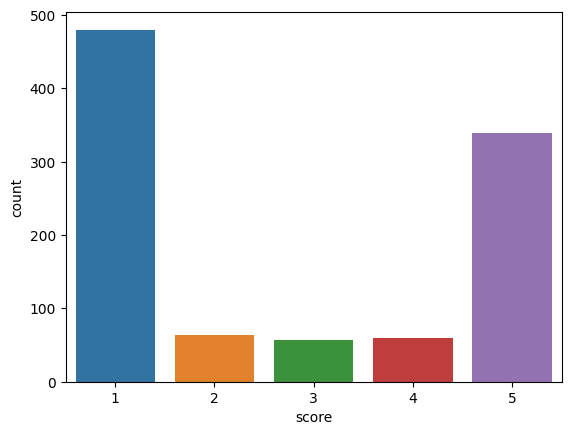

In [ ]:
import seaborn as sns
sns.countplot(x='score', data=ulasan);

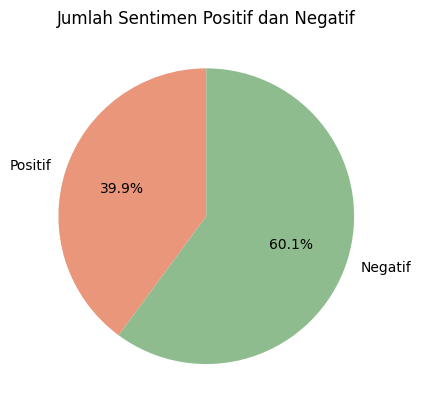

In [ ]:
import matplotlib.pyplot as plt

# Data jumlah sentimen positif dan negatif sebelum preprocess
jumlah_sentimen = [399, 601]  # Contoh jumlah sentimen positif dan negatif

# Label untuk diagram pie
labels = ['Positif', 'Negatif']

# Warna untuk setiap bagian diagram pie
colors = ['#E9967A', '#8FBC8F']

# Membuat diagram pie
plt.pie(jumlah_sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menampilkan judul diagram pie
plt.title('Jumlah Sentimen Positif dan Negatif')

# Menampilkan diagram pie
plt.show()


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

preprocessing

casefolding

In [ ]:
def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
ulasan['CaseFolding']= ulasan['ulasan'].apply(casefoldingText)
print('Case Folding Result: \n')
print(ulasan['CaseFolding'].head(5))
print('\n\n\n')

Case Folding Result: 

0    ini knp yaa, baru 1 hari berlangganan lancar n...
1    kok banyak error nya sih ? sdh berlangganan tp...
2    apaan ini?saya cuman berlangganan 1 bulan dan ...
3    sekarang cara pembelian paketnya ribet , ga bi...
4                                        aplikasi babi
Name: CaseFolding, dtype: object






cleaning

In [ ]:
import re
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
ulasan['Cleaning']= ulasan['CaseFolding'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['HapusEmoji']= ulasan['Cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
ulasan['Spasi']= ulasan['HapusEmoji'].apply(replaceTOM)

print('Cleaning: \n')
print(ulasan['Cleaning'].head(5))
print('\n\n\n')

Cleaning: 

0    ini knp yaa  baru   hari berlangganan lancar n...
1    kok banyak error nya sih   sdh berlangganan tp...
2    apaan ini saya cuman berlangganan   bulan dan ...
3    sekarang cara pembelian paketnya ribet   ga bi...
4                                        aplikasi babi
Name: Cleaning, dtype: object






tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan
ulasan['Tokenizing']= ulasan['HapusEmoji'].apply(tokenizingText)
print('Tokenizing Result: \n')
print(ulasan['Tokenizing'].head(5))
print('\n\n\n')

Tokenizing Result: 

0    [ini, knp, yaa, baru, hari, berlangganan, lanc...
1    [kok, banyak, error, nya, sih, sdh, berlanggan...
2    [apaan, ini, saya, cuman, berlangganan, bulan,...
3    [sekarang, cara, pembelian, paketnya, ribet, g...
4                                     [aplikasi, babi]
Name: Tokenizing, dtype: object






stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

daftar_stopword = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
daftar_stopword.extend(["yg","dg","rt","mah","kok","eh","ya","di","dan","atau","n","g","sih","kan","mnt","hahaha","wkwkwk","jt","woooiyy","an","astafirlah",
                        "truss","x","up","welehh","euy","mute","lah","afk","anjuter","*","dunya","sekaliudah","gt","ig","diapp","lagi","streeming","leg","taeek",
                        "lu","jufa","taik","sih","si","sihh","flem","yang","vitur","utk","untuk","gt","gitu","yai","tu","d","nge","a","s","mobile","apaan","apasi",
                        "sm","sama","sma","suasta","palembang","kab","enim","muara","ny","krna","kog","blok","haha","yah","rp","epl","nba","ko","bsa","bgtu","koq",
                        "ja","shopipay","up","yaa","milenial","jaman","now","gopay","yng","dodong","rb","jt","bat","dah","by","email","gmail","struk","google",
                        "play","pusa","ppn","tetal","ppnnya","sebsar","an","up","nya","ke","lh","gc","bgt","bngt","banget","super","loding","ud","nih","ni","asu",
                        "loh","hadeh","hadehh","nya","tuh","itumh","aja","duper","persen","bohongin","goblokin","sumpa","kapok","haduhh","jga","tuu","bad","wifi",
                        "kuota","quota","doang","laganan","platinum","premier","primer","platimum","taugak","fillm","luar","negri","jgn","ntar","warkop","dki","diputer",
                        "translatenya","pas","parahhv","udh","taugak","dowikl","gmw","durasix","developer","admin","min","layanana","premium","pake","model","f","paadahal",
                        "langgann","jd","vipp","&","nggk","dll","filmnyaa","tuh","hu","maluu","pas","liga","diklik","klik","org","wkwkwkkwk","pdhal","yaelah","pen",
                        "pen","drama","ajg","movie","hot","ngk","diyoutube","diaplikasi","hmm","ready","pol","oper","sana","sini","ber","baya","luhah","maf","bayar",
                        "tv","bola","kasi","boot","komen","teman","streaming","gini","nyari","feed","back","play","smua","balas","balasan","email","trus","apa","un",
                        "install","ulang","paket","all","your","video","can","not","be","played","balas","kepotong","rw","aseztrdeh","login","hp","laptop","utk",
                        "klo","ni","kko","booming","jaringan","live","tpi","moga","ranting","sia","sia","begini","nya","nyoba","udh","anime","youtube","disini","ditempat",
                        "reconect","lagii","loh","premiere","p","nontong","jerni","dgn","dulu","next","saat","paketnya","ilegal","aja","tempat","timnas","indonesia",
                        "masa","berlangaan","apa","blog","u","lo","doang","belom","vocher","burung","netflix","buat","sperti","besa","sz","ulangan","full","match",
                        "vs","fiji","ogah","mengetik","dipencarian","x","ditv","kenapa","ada","v","segera","global","voucher","pemotongan","shopeepay","bln","duwit",
                        "we","kotak","tekan","tanda","silang","ketekan","highlight","sepakbola","yuk","nomer","sepak","bola","atau","ber","ekonomi","buffring",
                        "developeer","tlong","prbaiki","data","seluler","cars","njir","flim","mola","kontes","fantasy","game","gx","chelsea","southamton","ma","laporin",
                        "gays","gpp","by","ad","keburu","buffer","team","sex","kn","anakyg","thnan","zg","open","b","*","padalan","hadeh","notofikasi","peket","eps",
                        "byk","aplikkasi","lgi","ujung","semuaa","anying","ijo","dong","lgi","sperti","huuffhh","nuggu","otp","otpnya","mbayar","ngeluarin","hah","arab",
                        "aolikasi","tingal","donlod","anj","maksdnya","apaan","nontn","x","prem","padhl","gada","da","bnget","timnas","aj","ny","masak","primeum","beelangganan",
                        "lah","primier","league","itung","csr","asu","vocer","wahai","para","orang","sok","pintar","uninstal","jalan","ninjaku","cennel","sebelah","lawak",
                        "nglag","thai","veer","zaara","d","iklah","untuj","bli","nyaa","dodol","ja","gimna","tim","nas","rcti","mmc","link","kae","instalnya","ajg","ud",
                        "ngebleng","ad","fantasy","team","bein","sport","ya","klo","ksih","dl","e","log","out","sendiri","anjir","cinta","anak","sholeh","dongan","cri","yh",
                        "trimakasih","salam","jawa","tengah","pidio","jerman","k","server","cuma","bhay","ko","pegam","pp","pun","paki","ovo","transfer","debit","kartu",
                        "kredit","atm","lodingnya","t","om","ngeh","disney","hotstar","teurs","bokef","hai","kak","indihome","yah","taro","menganggu","makasih","washtup,",
                        "astagfirullah","ulangan","hadeuh","tranfer","mola","duh","s","k","dv","animenya","season","pokemon","doank","donk","palah","e","lagu","no","nto","n",
                        "more","deh","alnya","filmny","kengkap","cenel","net","kbuka","tah","x","lipat","sampek","kali","ahir","pause","box","office","poll","saja","strean",
                        "record","adsnya","on","line","cimta","loh","maaih","v","r","kayak","fillm","pengabdi","setan","jalangkung","babang","dodo","indosiar","youtube","php",
                        "btw","curhat","kuato","dpapo","donk","trims","gb","khan","nge","ko","mksh","lodingnya","tgl","lihatx","eh","cz","ceritax","nor","would","piala","fa",
                        "qispsl","mantab","ifos","s","bru","developed","c","no","of","m","vim","vocer","p","s","bvby","yybhyhbyhby","y","hbyhnhuyhy","yy","ybynhhyyhyhnyhh",
                        "thyyhynyynynyuyhyyh","yhnyhnyhhyhnh","y","yhynhyy","yyhyhnynhnh","h","hy","ynyy","hy","hnhhyh","nhhnynynny","y","yhnh","yhnynyy","yyhy",
                        "hnhhnyynyynyhyh","yh","hnyhhyhyy","hnynyynyyhhyyhuyh","yuh","hnhnyynyh","hyhnyhyyhyynyynyuyyhyhyhyuyynynhy","nyhyhy","yy","yhhnh","hnyhy",
                        "hyhyhyhnynh","yhhnyyny","yhh","yyh","yhhnhyyh","hnnhnhnyyhnyn","hnhnhnbyhyhnyhhnh","nhyh","nhnh","pildun","e","%","asalamualaikun","assalamualaikum",
                        "hpnya","tuh","scren","miror","pliss","is","the","halo","be","mk","hdburvhu","a","anjir","ah","rifqidua","aqil","filembuf","dria","ko","gg","tara","arawkum",
                        "imbuh","h","rusia","masbro","dna","hihi","ad","pntk","aaamin","wahromatullahi","wabarokatu","hampura","glombang","inih","kern","gass","v","alone","jvivv",
                        "sc","mah","bos","yuli","anasarita","sslmwslz","leelzw","zsozzw","wzezlzsll","wz","eovk","nppzzslolkzzseoslso","m","riski","dwi","xxxii","rb","ev","kk",
                        "soalx","kkokeh","nie","gjakamma","zidane","efd","k","coki","hehe","ggs","hallo","pokok","yaitu","yakin","yakni","yang","ada","adalah","adanya","adapun",
                        "agak","agaknya","agar","akan","akankah","akhir","akhiri","akhirnya","apa","apaan","apabila","apakah","apalagi","atau","dan","dapat","dari","daripada","datang",
                        "dekat","di","ke","knp","in","jln","gtvnya","diamond","bri","bo","woii","farhan","ayah","bro","yo","persib","teu","ngarti","ribu","lho","woy","ku","nenek",
                        "pacaran","aje","boneka","unyil","wooiyy","kaleng","ngentot","ky","l","ben","king","heart","turki","selamat","sore","yak","rusian","blue","com","pro","voli",
                        "kabupaten","domisili","force","close","minim","big","cnn","cnbc","eropa","it","assalamualaikum","mu","yatim","radha","krishna","sctv","moji","emtek",
                        "prabumulih","ayo","plus","haduh","livin","ngefrem","ml","buferingnya","hotsar","hub","send","washtup","astaghfirullah","telkomser","boys","planet",
                        "premiernya","al","nassr","yaampun","cm","asyiikk","hehehe","spanyol","prancis","italia","wow","ayok","fajar","sadboy","bca","playstore","appstore",
                        "huh","fira","sridevi","facebook","md","bpjs","sktm","falling","into","smile","and","this","xl","word","cup"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
 return [word for word in words if word not in daftar_stopword]

ulasan['Stopword Removal'] = ulasan['Tokenizing'].apply(stopwordText)
print('Stopword Removal Result: \n')
print(ulasan['Stopword Removal'].head(5))
print('\n\n\n')

Stopword Removal Result: 

0    [berlangganan, lancar, nonton, apapun, besok, ...
1                 [error, sdh, berlangganan, aktifkan]
2    [cuman, berlangganan, saldo, mengurang, berhen...
3                        [pembelian, ribet, ga, pulsa]
4                                     [aplikasi, babi]
Name: Stopword Removal, dtype: object






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
slang_word_dict = {"knp": "kenapa", "gabisa": "tidak bisa", "gtu": "gitu", "lemot": "lelet", "sdh": "sudah", "tpi": "tapi", "nggk": "tidak",
                   "apaan": "apa", "cuman": "cuma", "balikin": "kembalikan", "ga": "tidak", "apk": "aplikasi", "gk": "tidak", "rekomended": "direkomendasikan",
                   "uninstal": "hapus instalasi", "downlod": "unduh", "nyedot": "menyedot", "doang": "hanya", "live": "siaran langsung", "gak": "tidak",
                   "bis": "bisa", "gw": "saya", "hbs": "habis", "ap": "apa", "klo": "kalau", "dipke": "dipake", "bosok": "busuk", "n": "dan", "g": "gak",
                   "download": "unduh", "sama in": "samakan", "purchase": "pembelian", "app": "aplikasi", "loading": "memuat", "bae": "saja", "bnrin": "benarkan",
                   "jwb": "jawab", "nda": "tidak", "upload": "mengunggah", "tuk": "untuk", "di update": "diperbarui", "ngelag": "tertinggal", "tiba": "tiba-tiba",
                   "pokonya": "pokoknya", "chanel": "saluran", "yg": "yang", "patah patah": "patah-patah", "mkin": "makin", "d update": "diperbarui", "koq": "kok",
                   "ngebug": "berhenti", "jd": "jadi", "kesel": "kesal", "gmbrny": "gambarnya", "dah": "sudah", "error": "eror", "uninstal": "hapus instalasi",
                   "tpy": "tapi", "siarab": "siaran", "apasa": "apa sih", "jls": "jelas", "kenceng": "kencang", "jg": "juga", "tp": "tapi", "dri": "dari",
                   "jdi": "jadi", "nnton": "nonton", "sunggu": "sungguh", "platimum": "platinum", "klu": "kalau", "tv": "televisi", "hostart": "disney+ hostar",
                   "rating": "peringkat", "dll": "dan lain-lain", "auto": "otomatis", "ttep": "tetap", "woi": "hei", "goblogk": "goblok", "anjink": "anjing",
                   "taii": "tai", "nyobain": "mencoba", "provider": "penyedia", "apps": "aplikasi", "not rekomended": "tidak direkomendasikan", "ndak": "tidak",
                   "mabual": "manual", "ket": "keterangan", "tolool": "tolol", "dibut": "dibuat", "kntl": "dasar", "udh": "sudah", "klaw": "kalau", "sy": "saya",
                   "egak": "tidak", "e": "eh", "yaela": "ya ampun", "jeleklk": "jelek", "ni": "ini", "skrg": "sekarang", "ngrugiin": "merugikan", "angus": "hangus",
                   "mndg": "mending", "komit": "komitmen", "y": "ya", "blm": "belum", "qo": "kok", "buqnh": "buang", "gua": "saya", "ko": "kok", "dipake": "dipakai",
                   "burik": "buruk", "kya": "kaya", "prtandingannya": "pertandingannya", "cma": "cuma", "tpii": "tapi", "msalahnya": "masalahnya", "yng": "yang",
                   "kudu": "harus", "enggak": "tidak", "tf": "transfer", "refund": "pengembalian uang", "adain": "adakan", "bokep": "porno", "yok": "yuk",
                   "teu ngarti": "tidak mengerti", "nii": "ini", "yahh": "ya", "ajah": "aja", "diupdate": "diperbarui", "rb": "ribu", "jgn": "jangan", "bs": "bisa",
                   "ngefrezz": "membeku", "nyendat": "menyendat", "langgana": "langganan", "bgt": "banget", "kesalajan": "kesalahan", "bget": "banget", "mkin": "makin",
                   "burikk": "buruk", "load": "memuat", "di updet": "diperbarui", "bnyak": "banyak", "trs": "terus", "lg": "lagi", "sllu": "selalu", "skrg": "sekarang",
                   "goggle": "google", "aplikasih": "aplikasi", "sm": "sama", "ngeleg": "lambat", "mnt mnt mnt": "menit menit menit", "syebal": "sebal", "lag": "lambat",
                   "km": "kamu", "bad mood": "suasana hati buruk", "truss": "terus", "dh": "sudah", "dungi": "dungu", "buffering": "memuat", "nd": "tidak", "ksni": "kesini",
                   "mlah": "malah", "bnyk": "banyak", "bnget": "banget", "nhi": "ini", "bs": "bisa", "smph": "sumpah", "adain": "adakan", "feporma": "performa", "ni": "ini",
                   "loadung": "memuat", "stuck": "mentok", "refresh": "segarkan", "mmg": "memang", "mendownload": "mengunduh", "size": "ukuran", "lag": "lambat", "setabil": "stabil",
                   "ngak": "tidak", "taii": "tai", "jga": "juga", "msih": "masih", "nnton": "nonton", "lncar": "lancar", "kyk": "seperti", "jgn": "jangan", "pdhal": "padahal",
                   "bar": "sinyal", "full": "penuh", "nyediain": "menyediakan", "gada": "tidak ada", "trs": "terus", "quota": "kuota", "branda": "beranda", "smw": "semua", "kgk": "tidak",
                   "bundling": "paket", "coment": "komentar","wktnya": "waktunya", "ksih": "kasih", "pdhl": "padahal", "slah": "salah", "gajelas": "tidak jelas", "unfaedah": "tidak bermanfaat",
                   "list": "daftar", "mood": "suasana hati", "memberbaru": "memperbarui", "nyedat": "tersendat", "klk": "kalau", "bngt": "banget", "bgt": "banget", "agk": "agak", "install": "memasang",
                   "instal": "memasang", "tlng": "tolong", "tlg": "tolong", "dftar": "daftar", "prpanjang": "perpanjang", "ngk": "tidak", "pdahal": "padahal", "delay": "lambat", "button": "tombol",
                   "gwe": "saya", "diem": "diam", "buanyak": "banyak", "males": "malas", "jellek": "jelek", "pake": "pakai", "kek": "seperti", "sampag": "sampah", "trabaik": "terbaik", "skli": "sekali",
                   "filem": "film", "jagan": "jangan", "setengahgitu": "setengah", "bego": "bodoh", "blank": "eror", "recommended": "direkomendasikan", "bad": "buruk", "quality": "kualitas", "jembot": "buruk",
                   "bad": "buruk", "service": "pelayanan", "gajelas": "tidak jelas", "ratingnya": "peringkatnya", "burik": "buruk", "bosok": "busuk", "ngeselin": "kesal", "gue": "saya", "apl": "aplikasi",
                   "bangkek": "busuk", "w": "saya", "stuck": "macet", "lemot": "lelet", "bagusan": "bagus","pea": "buruk", "bet": "banget", "free": "gratis", "ancur": "hancur", "bufering": "memuat",
                   "reload": "memuat kembali","free": "gratis", "redeem": "menebus", "reward": "hadiah", "blank": "kosong", "koment": "komentar", "gjls": "tidak jelas", "banned": "dilarang", "web": "situs",
                   "lgsg": "langsung", "gunain": "gunakan", "loading": "memuat", "perbaikin": "perbaiki", "mo": "mau", "member": "anggota", "liat": "lihat", "review": "ulasan", "bru": "baru", "trnyta": "ternyata",
                   "bkan": "bukan", "aq": "aku","kcewa": "kecewa", "krena": "karena", "ska": "suka", "mendownload": "mengunduh", "ngga": "tidak", "offline": "luring", "tida": "tidak", "kepake": "terpakai",
                   "pengen": "ingin", "kutambahin": "saya tambahkan", "knpa": "kenapa", "apkny": "aplikasinya", "dikurangin": "dikurangi", "oke": "bagus", "ilang": "hilang", "bgss": "bagus", "terimakasih": "terima kasih",
                   "bs": "bisa", "sudh": "sudah", "dkurangi": "kurangi", "tampilin": "tampilkan", "movie": "film", "melaui": "melalui", "nomer": "nomor", "login": "masuk", "screenrecord": "rekam layar", "dr": "dari",
                   "live": "siaran langsung", "ok": "bagus", "ok": "bagus", "bangke": "busuk", "freeze": "macet", "bis": "bisa", "uptudate": "terkini", "kaga": "tidak", "history": "riwayat", "b": "biasa", "aja": "saja",
                   "ngk": "tidak", "krn": "karena", "mantul": "mantap betul", "suska": "suka", "device": "alat", "banyakin": "diperbanyak", "eksternal": "luar", "subtitle": "terjemahan", "english": "bahasa inggris",
                   "sya": "saya", "aqu": "saya", "tambahin": "tambahkan", "framedrop": "penurunan", "mengasih": "memberi", "sahgat": "sangat", "jngn": "jangan", "kurangin": "kurangi", "bnyk": "banyak", "adain": "adakan",
                   "ttp": "tetap", "lipa": "lupa", "gabisa": "tidak bisa", "worth it": "sepadan", "good": "bagus", "godd": "bagus", "membantun": "membantu", "cucok": "cocok", "moga": "semoga", "mnsnggapi": "menanggapi",
                   "kluar": "keluar", "mo": "mau", "duku": "dulu", "gdaa": "tidak ada", "joss": "bagus", "jos": "bagus", "handphone": "telepon seluler", "brp": "berapa", "the best": "terbaik", "nice": "bagus",
                   "aplikasih": "aplikasi", "jerni": "jernih", "dowloud": "unduh", "bgus": "bagus", "bngiit": "banget", "dengerin": "mendengarkan", "lgi": "lagi", "enggak": "tidak", "gandos": "sekali", "appilkasi": "aplikasi",
                   "donlot": "unduh", "oksi": "bagus", "cmn": "cuma", "bisah": "bisa", "prefek": "sempurna", "cenel": "saluran", "donglot": "unduh", "bguss": "bagus", "vilm": "film", "manataps": "mantap", "stream": "siaran",
                   "love it": "suka ini", "guud": "bagus", "sanggat": "sangat", "great": "bagus", "kesel": "kesal", "prostes": "protes", "lu": "kamu", "alus": "bagus", "sae": "bagus", "adminya": "adminnya", "cepet": "cepat",
                   "pertahanin": "pertahankan", "app": "aplikasi", "syukaa": "suka", "dwnd": "unduh", "like it videos": "suka video ini", "dgn": "dengan", "notif": "notifikasi", "cs": "customer service", "garcep": "gerak cepat",
                   "enjoy": "menikmati", "kn": "kan", "bole": "boleh", "syng": "sayang", "lbh": "lebih", "terkaper": "dibiayai", "love": "cinta", "bad": "buruk", "so": "jadi", "stop": "berhenti", "saying": "mengatakan",
                   "this video apk is": "aplikasi video ini", "often": "sering", "thebest": "terbaik", "tau": "tahu", "gak": "tidak", "update": "perbarui", "uninstall": "lepas pemasangan", "muter": "berputar", "updete": "perbarui",
                   "streamingnya": "siaran langsung", "langgangan": "langganan", "livestreaming": "siaran langsung", "apdate": "perbarui", "customer service": "layanan pelanggan", "like": "suka", "updet": "perbarui", "smart": "pintar",
                   "dowload": "unduh", "bug": "macet", "hd": "jernih", "color": "warna", "grading": "gradasi", "bangeet": "sekali", "langganana": "langganan", "loaading": "memuat", "drpd": "daripada", "malh": "malah", "skip": "lewati",
                   "kayak": "seperti", "genre": "jenis", "fix": "perbaiki", "tnp": "tanpa", "uda": "sudah", "gmn": "gimana", "abis": "habis", "chat": "pesan", "fans": "penggemar", "didownload": "diunduh", "vidionya": "video", "dlu": "dulu",
                   "nyesell": "menyesal", "inii": "ini", "baguss": "bagus", "teruss": "terus", "loadingnya": "memuat", "elor": "eror", "streming": "siaran langsung", "nongton": "nonton", "karna": "karena", "unlimited": "tidak terbatas",
                   "trailer": "cuplikan", "tar": "nanti", "jeleek": "jelek", "laen": "lain", "games": "permainan", "menyecewakan": "mengecewakan", "wifinya": "jaringan", "seribet": "ribet", "digital": "elektronik", "user": "pengguna",
                   "kmrn": "kemarin", "nyontek": "menyontek", "nyolong": "mencuri", "pakek": "pakai", "nggak": "tidak", "tetep": "tetap", "bner": "benar", "gausah": "tidak usah", "intall": "memasang", "udahalah": "sudah", "benerin": "benarkan",
                   "belain": "membela", "nntn": "nonton", "jaringgan": "jaringan", "bnr": "benar", "bangett": "banget", "promokan": "promo", "dapt": "dapat", "diaplikasi": "aplikasi", "sabgat": "sangat", "gadget": "gawai", "lemott": "lemot",
                   "tdk": "tidak", "amatt": "sangat", "recomended": "direkomendasikan", "dimanfaatin": "dimanfaatkan", "gmna": "gimana", "pengemar": "penggemar", "dilaporin": "dilaporkan", "bkn": "bukan", "channel": "saluran", "nungguin": "menunggu",
                   "slesai": "selesai", "lanjutin": "lanjutkan", "balasanya": "balasannya", "minusnya": "kurangnya", "mesti": "harus", "paketin": "paketkan", "series": "serial", "berenti": "berhenti", "mundurin": "mundurkan", "puteer": "putar",
                   "bisaa": "bisa", "kburu": "keburu", "kouta": "kuota", "rmh": "rumah", "berlanganan": "berlangganan", "berlangaganan": "berlangganan", "dikarnakan": "dikarenakan", "jelasin": "jelaskan", "permasalahanya": "permasalahannya",
                   "subtitel": "terjemahan", "duitin": "uangkan", "walapun": "walaupun", "bantuanya": "bantuannya", "nnya": "nanya", "gaa": "tidak", "lamaa": "lama", "spam": "sampah", "butuhin": "butuhkan", "bgs": "bagus", "kli": "kali",
                   "webnya": "situsnya", "frezze": "membeku", "bgtt": "banget", "masukin": "masukkan", "show": "pertunjukkan", "talalu": "terlalu", "lebay": "berlebihan", "hrus": "harus", "flm": "film", "faham": "paham", "sip": "bagus",
                   "seneng": "senang", "iklanya": "iklannya", "koreanya": "korea", "diandroid": "android", "edit": "sunting", "lunayan": "lumayan", "worth": "sepadan", "jelass": "jelas", "best": "terbaik", "mantapp": "mantap", "original": "asli",
                   "aplkasinya": "aplikasinya", "sgt": "sangat", "epesode": "episode", "pokoknyaa": "pokoknya", "cakap": "berbicara", "job": "pekerjaan", "gratiss": "gratis", "pastil": "pasti", "apknya": "aplikasinya", "andal": "handal",
                   "aplikasimya": "aplikasinya", "poko": "pokoknya", "kalou": "kalau", "siip": "bagus", "drma": "drama", "virtual": "maya", "movies": "film", "aktipin": "aktifkan", "kasian": "kasihan", "ngasih": "memberi", "mantep": "mantap",
                   "responnya": "tanggapannya", "vidoenya": "videonya", "videos": "video", "hollywood": "barat", "filmya": "filmnya", "ngefens": "menggemari", "ending": "penutup", "originals": "asli", "entertainment": "hiburan", "aplikasinyaa": "aplikasinya",
                   "makasi": "terima kasih", "banyakk": "banyak", "engga": "tidak", "simple": "sederhana", "gambrnya": "gambarnya", "seriesnya": "serialnya", "licik": "curang", "pembaharuan": "pembaruan", "indo": "Indonesia"}


def slang_normalized_term(document):
    return [slang_word_dict[term] if term in slang_word_dict else term for term in document]

In [ ]:
normalized_word = pd.read_csv("/content/drive/MyDrive/SKRIPSI/skripsi (hasil revisi)/stopwords.txt")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[0]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

ulasan['Normalized_Words'] = ulasan['Stopword Removal'].apply(normalized_term).apply(slang_normalized_term)
print('Normalized Words Result: \n')
print(ulasan['Normalized_Words'].head(5))
print('\n\n\n')

Normalized Words Result: 

0    [berlangganan, lancar, nonton, apapun, besok, ...
1                [eror, sudah, berlangganan, aktifkan]
2    [cuma, berlangganan, saldo, mengurang, berhent...
3                     [pembelian, ribet, tidak, pulsa]
4                                     [aplikasi, babi]
Name: Normalized_Words, dtype: object






In [ ]:
normalized_word.to_csv('normalisasi.csv')

stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in ulasan['Normalized_Words']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

ulasan['Stemming'] = ulasan['Normalized_Words'].swifter.apply(stemmingText)

berlangganan : langgan
lancar : lancar
nonton : nonton
apapun : apa
besok : besok
paginya : pagi
udah : udah
tidak bisa : tidak bisa
disuruh : suruh
rugi : rugi
kalo : kalo
gitu : gitu
eror : eror
sudah : sudah
aktifkan : aktif
cuma : cuma
saldo : saldo
mengurang : kurang
berhenti : henti
kembalikan : kembali
pembelian : beli
ribet : ribet
tidak : tidak
pulsa : pulsa
aplikasi : aplikasi
babi : babi
mengecewakan : kecewa
pelanggan : langgan
vidio : vidio
lelet : lelet
mohon : mohon
perbaiki : baik
kadang : kadang
tulisan : tulis
habis : habis
berbayar : bayar
direkomendasikan : rekomendasi
unduh : unduh
kacau : kacau
menyedot : sedot
bisa : bisa
saya : saya
dipakai : pakai
gunanya : guna
apa : apa
dipake : dipake
cacat : cacat
busuk : busuk
diputar : putar
lihat : lihat
saluran : salur
konfirmasi : konfirmasi
pembodohan : bodoh
menonton : tonton
siaran : siar
merugikan : rugi
putus : putus
stabil : stabil
harganya : harga
mahal : mahal
kualitasnya : kualitas
mengikuti : ikut
tahu : tahu

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
ulasan.head()

,score,ulasan,CaseFolding,Cleaning,HapusEmoji,Spasi,Tokenizing,Stopword Removal,Normalized_Words,Stemming
0,1,"Ini knp yaa, baru 1 hari berlangganan lancar n...","ini knp yaa, baru 1 hari berlangganan lancar n...",ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar non...,"[ini, knp, yaa, baru, hari, berlangganan, lanc...","[berlangganan, lancar, nonton, apapun, besok, ...","[berlangganan, lancar, nonton, apapun, besok, ...","[langgan, lancar, nonton, apa, besok, pagi, ud..."
1,1,Kok banyak error nya sih ? Sdh berlangganan tp...,kok banyak error nya sih ? sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tpi ...,"[kok, banyak, error, nya, sih, sdh, berlanggan...","[error, sdh, berlangganan, aktifkan]","[eror, sudah, berlangganan, aktifkan]","[eror, sudah, langgan, aktif]"
2,1,APAAN INI?SAYA CUMAN BERLANGGANAN 1 BULAN DAN ...,apaan ini?saya cuman berlangganan 1 bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan su...,"[apaan, ini, saya, cuman, berlangganan, bulan,...","[cuman, berlangganan, saldo, mengurang, berhen...","[cuma, berlangganan, saldo, mengurang, berhent...","[cuma, langgan, saldo, kurang, henti, langgan,..."
3,1,"Sekarang cara pembelian paketnya ribet , ga bi...","sekarang cara pembelian paketnya ribet , ga bi...",sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bisa...,"[sekarang, cara, pembelian, paketnya, ribet, g...","[pembelian, ribet, ga, pulsa]","[pembelian, ribet, tidak, pulsa]","[beli, ribet, tidak, pulsa]"
4,1,Aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,"[aplikasi, babi]","[aplikasi, babi]","[aplikasi, babi]","[aplikasi, babi]"


In [ ]:
def join_text_list(texts):
    return ' '.join(texts)

ulasan["dataset_join"] = ulasan["Stemming"].apply(join_text_list)

ulasan["dataset_join"].head()

0    langgan lancar nonton apa besok pagi udah tida...
1                             eror sudah langgan aktif
2    cuma langgan saldo kurang henti langgan kembal...
3                               beli ribet tidak pulsa
4                                        aplikasi babi
Name: dataset_join, dtype: object

In [ ]:
ulasan.to_csv("hasil preprocessing baru.csv")

EDA

In [ ]:
# Load the labeled dataset
df = pd.read_csv("/content/drive/MyDrive/SKRIPSI/skripsi (hasil revisi)/labeling/hasil preprocessing baru.csv")

In [ ]:
df.head()

,Unnamed: 0,score,label,ulasan,CaseFolding,Cleaning,HapusEmoji,Spasi,Tokenizing,Normalized_Words,Stopword Removal,Stemming,dataset_join
0,1,1,0,"Ini knp yaa, baru 1 hari berlangganan lancar n...","ini knp yaa, baru 1 hari berlangganan lancar n...",ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar non...,"['ini', 'knp', 'yaa', 'baru', 'hari', 'berlang...","['berlangganan', 'lancar', 'nonton', 'apapun',...","['berlangganan', 'lancar', 'nonton', 'apapun',...","['langgan', 'lancar', 'nonton', 'apa', 'besok'...",langgan lancar nonton apa besok pagi udah tida...
1,2,1,0,Kok banyak error nya sih ? Sdh berlangganan tp...,kok banyak error nya sih ? sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tpi ...,"['kok', 'banyak', 'error', 'nya', 'sih', 'sdh'...","['eror', 'sudah', 'berlangganan', 'aktifkan']","['error', 'sdh', 'berlangganan', 'aktifkan']","['eror', 'sudah', 'langgan', 'aktif']",eror sudah langgan aktif
2,3,1,0,APAAN INI?SAYA CUMAN BERLANGGANAN 1 BULAN DAN ...,apaan ini?saya cuman berlangganan 1 bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan su...,"['apaan', 'ini', 'saya', 'cuman', 'berlanggana...","['cuma', 'berlangganan', 'saldo', 'mengurang',...","['cuman', 'berlangganan', 'saldo', 'mengurang'...","['cuma', 'langgan', 'saldo', 'kurang', 'henti'...",cuma langgan saldo kurang henti langgan kembal...
3,4,1,0,"Sekarang cara pembelian paketnya ribet , ga bi...","sekarang cara pembelian paketnya ribet , ga bi...",sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bisa...,"['sekarang', 'cara', 'pembelian', 'paketnya', ...","['pembelian', 'ribet', 'tidak', 'pulsa']","['pembelian', 'ribet', 'ga', 'pulsa']","['beli', 'ribet', 'tidak', 'pulsa']",beli ribet tidak pulsa
4,5,1,0,Aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,"['aplikasi', 'babi']","['aplikasi', 'babi']","['aplikasi', 'babi']","['aplikasi', 'babi']",aplikasi babi


In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['score']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['score']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['score']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['score']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['score']==5.0])} rows")

Input data has 940 rows and 13 columns
rating 1.0 = 472 rows
rating 2.0 = 58 rows
rating 3.0 = 54 rows
rating 4.0 = 54 rows
rating 5.0 = 302 rows


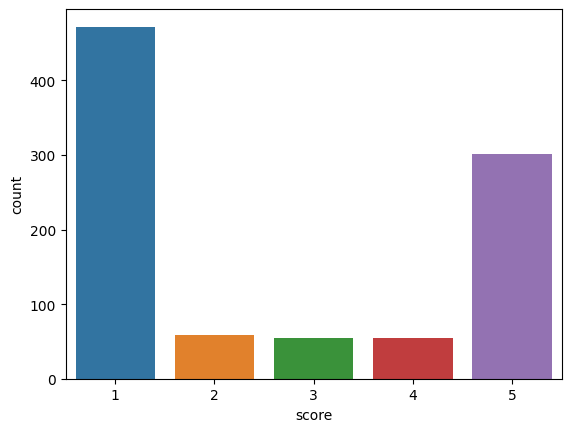

In [ ]:
import seaborn as sns
sns.countplot(x='score', data=df);

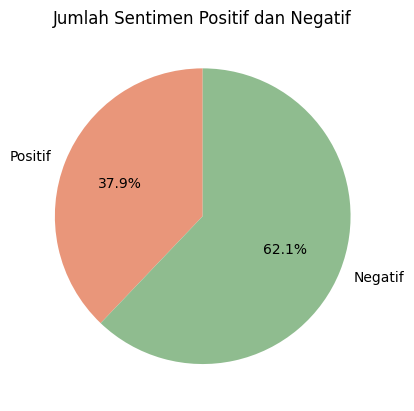

In [ ]:
import matplotlib.pyplot as plt

# Data jumlah sentimen positif dan negatif sesudah preprocess
jumlah_sentimen = [356, 584]  # Contoh jumlah sentimen positif dan negatif

# Label untuk diagram pie
labels = ['Positif', 'Negatif']

# Warna untuk setiap bagian diagram pie
colors = ['#E9967A', '#8FBC8F']

# Membuat diagram pie
plt.pie(jumlah_sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menampilkan judul diagram pie
plt.title('Jumlah Sentimen Positif dan Negatif')

# Menampilkan diagram pie
plt.show()


Wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['score']==1.0) | (df['score']==2.0) | (df['score']==3.0)]
df_positive = df[ (df['score']==4.0) | (df['score']==5.0)]
#convert to list
negative_list= df_negative['dataset_join'].tolist()
positive_list= df_positive['dataset_join'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

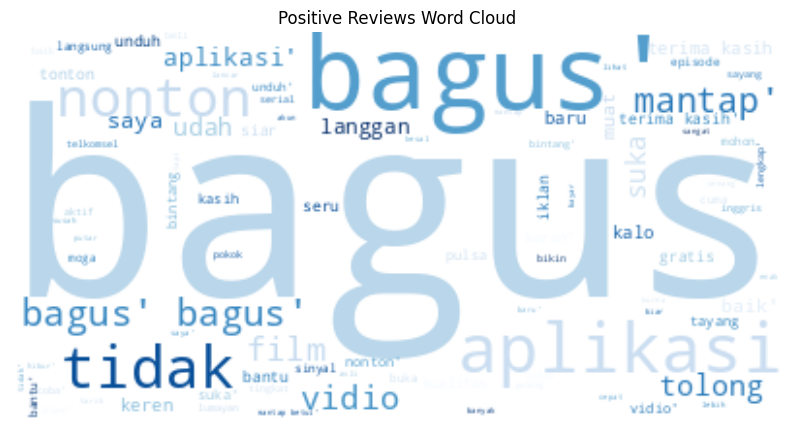

In [ ]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

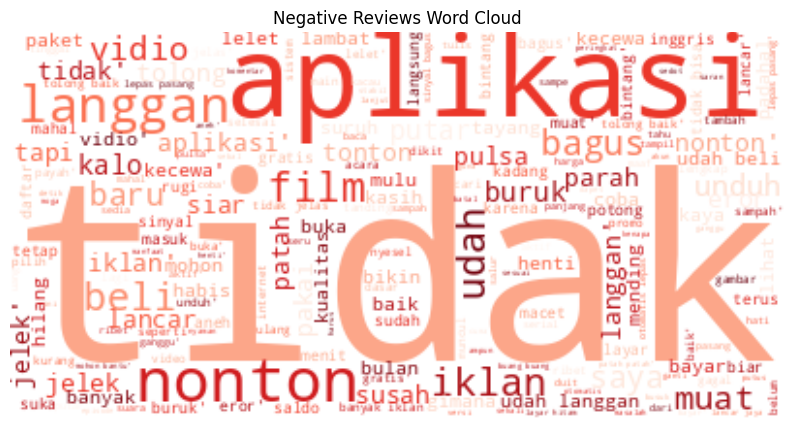

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

ekstraksi

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
import pickle
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Extract features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['dataset_join'])
y = df['label']

In [ ]:
# Convert the vectorized words to a DataFrame
vectorized_words_df = pd.DataFrame(X.toarray())

# Concatenate the vectorized words DataFrame with the original dataset
dataset_with_vectors = pd.concat([df, vectorized_words_df], axis=1)

In [ ]:
# Print the dataset with vectorized words
dataset_with_vectors

,Unnamed: 0,score,label,ulasan,CaseFolding,Cleaning,HapusEmoji,Spasi,Tokenizing,Normalized_Words,...,818,819,820,821,822,823,824,825,826,827
0,1,1,0,"Ini knp yaa, baru 1 hari berlangganan lancar n...","ini knp yaa, baru 1 hari berlangganan lancar n...",ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar n...,ini knp yaa baru hari berlangganan lancar non...,"['ini', 'knp', 'yaa', 'baru', 'hari', 'berlang...","['berlangganan', 'lancar', 'nonton', 'apapun',...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,Kok banyak error nya sih ? Sdh berlangganan tp...,kok banyak error nya sih ? sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tp...,kok banyak error nya sih sdh berlangganan tpi ...,"['kok', 'banyak', 'error', 'nya', 'sih', 'sdh'...","['eror', 'sudah', 'berlangganan', 'aktifkan']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0,APAAN INI?SAYA CUMAN BERLANGGANAN 1 BULAN DAN ...,apaan ini?saya cuman berlangganan 1 bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan ...,apaan ini saya cuman berlangganan bulan dan su...,"['apaan', 'ini', 'saya', 'cuman', 'berlanggana...","['cuma', 'berlangganan', 'saldo', 'mengurang',...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0,"Sekarang cara pembelian paketnya ribet , ga bi...","sekarang cara pembelian paketnya ribet , ga bi...",sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bi...,sekarang cara pembelian paketnya ribet ga bisa...,"['sekarang', 'cara', 'pembelian', 'paketnya', ...","['pembelian', 'ribet', 'tidak', 'pulsa']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0,Aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,aplikasi babi,"['aplikasi', 'babi']","['aplikasi', 'babi']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,936,5,1,Mantap lah pokok nya,mantap lah pokok nya,mantap lah pokok nya,mantap lah pokok nya,mantap lah pokok nya,"['mantap', 'lah', 'pokok', 'nya']",['mantap'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,937,5,1,"Penerimaan Sinyal & Gambar baik. Kenapa RCTI, ...","penerimaan sinyal & gambar baik. kenapa rcti, ...",penerimaan sinyal & gambar baik kenapa rcti ...,penerimaan sinyal & gambar baik kenapa rcti ...,penerimaan sinyal & gambar baik kenapa rcti ...,"['penerimaan', 'sinyal', '&', 'gambar', 'baik'...","['penerimaan', 'sinyal', 'gambar', 'mnctv']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,938,5,1,Sangat bagus,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"['sangat', 'bagus']",['bagus'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,939,5,1,Ok,ok,ok,ok,ok,['ok'],['bagus'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pickle

# saving
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(dataset_with_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('vectorizer.pickle', 'rb') as handle:
    vectorizer = pickle.load(handle)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
# Split the dataset into train and test sets with a fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
print("Data Training:")
print(X_train)

Data Training:
  (0, 473)	0.29981519170037985
  (0, 257)	0.24731196520274518
  (0, 518)	0.2828221715175921
  (0, 498)	0.2828221715175921
  (0, 127)	0.5228269959394387
  (0, 475)	0.21266591207046345
  (0, 607)	0.5228269959394387
  (0, 648)	0.178679871704888
  (0, 39)	0.20525650456807368
  (0, 768)	0.10095534948252588
  (0, 523)	0.11313374367257678
  (1, 55)	1.0
  (2, 446)	0.5139866706486792
  (2, 31)	0.8167991001546917
  (2, 796)	0.26202467895595677
  (3, 55)	1.0
  (4, 400)	1.0
  (5, 123)	0.3826819516843737
  (5, 24)	0.369464546954475
  (5, 266)	0.3997221500801455
  (5, 316)	0.369464546954475
  (5, 300)	0.369464546954475
  (5, 340)	0.3997221500801455
  (5, 565)	0.27907204542300573
  (5, 39)	0.14504798347958062
  :	:
  (748, 489)	0.3623887121989295
  (748, 778)	0.4104483437550164
  (748, 61)	0.3642779574222392
  (748, 523)	0.2473373808496626
  (749, 199)	0.6015104663853278
  (749, 111)	0.42033898323588864
  (749, 640)	0.5494081520295888
  (749, 319)	0.3995634874266631
  (750, 373)	0.4077

In [ ]:
print("Data Testing:")
print(X_test)

Data Testing:
  (0, 455)	1.0
  (1, 649)	0.4459621425116328
  (1, 775)	0.30904091457070304
  (1, 759)	0.5099731499037046
  (1, 701)	0.3718995615759304
  (1, 55)	0.19473696119491188
  (1, 61)	0.3138263363463767
  (1, 39)	0.1932951807543599
  (1, 204)	0.3653178105455352
  (2, 505)	0.37634611886477287
  (2, 567)	0.3550154546068589
  (2, 51)	0.3550154546068589
  (2, 244)	0.5052904507351381
  (2, 324)	0.4643126106499937
  (2, 746)	0.26075476754708327
  (2, 815)	0.18638334249449573
  (2, 39)	0.12882517464815674
  (2, 768)	0.12672524611212768
  (3, 733)	0.7785028307213521
  (3, 267)	0.6276410937461326
  (4, 773)	0.4836323313985748
  (4, 120)	0.4836323313985748
  (4, 43)	0.40936065444344055
  (4, 688)	0.421686502158629
  (4, 805)	0.2778074108969225
  :	:
  (181, 328)	0.2835332851786747
  (181, 272)	0.34128258029050856
  (181, 551)	0.31514230120183007
  (181, 604)	0.2571169464760663
  (181, 624)	0.3054808319042667
  (181, 204)	0.2676614005479345
  (181, 768)	0.27863028897353204
  (181, 796)	0.19

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a decision tree classifier with fixed parameters
classifier = DecisionTreeClassifier(random_state=25, max_depth=24, max_features=None)

In [ ]:
# Train the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=24, random_state=25)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.99      0.97        73

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



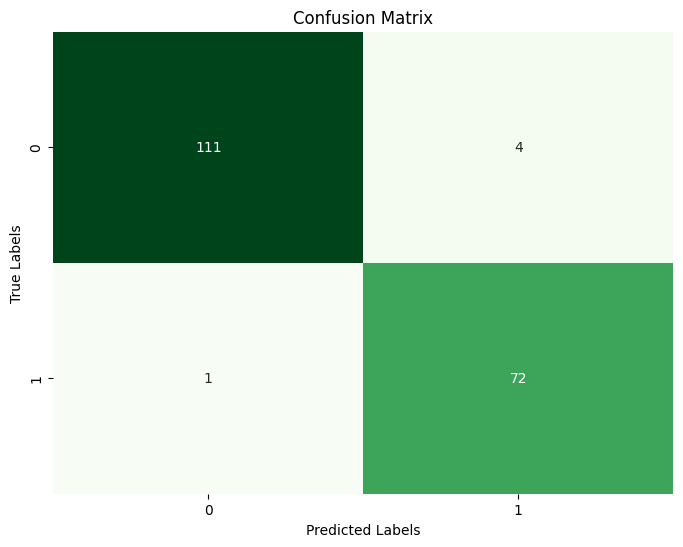

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.99      0.97        73

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188

Accuracy: 0.973404255319149


In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[111   4]
 [  1  72]]


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.973404255319149
Precision: 0.974101643737002
Recall: 0.973404255319149
F1 Score: 0.9734962549090036


In [ ]:
import pickle

# Simpan model ke file pkl
with open('model8020.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Memanggil model dari file pkl
with open('model8020.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.973404255319149


In [ ]:
# Save the dataset with vectorized words as a CSV file
dataset_with_vectors.to_csv('/content/dataset_with_vectors8020.csv', index=False)